<a href="https://colab.research.google.com/github/EvelynZhaoAnalytics/DataAnalystPortfolio/blob/main/TMDB_5000_Movie_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Welcome to the data analysis project of the TMDB 5000 Movie Dataset! This dataset contains information about more than 5000 movies from The Movie Database (TMDb), including their genres, keywords, ratings, revenues, budgets, cast and crew. In this project, we will explore the dataset and try to answer some interesting questions, such as: What are the most popular genres? How does the budget affect the revenue? Which actors and directors are the most successful? And more! We will use Python and various libraries to perform data cleaning, visualization and analysis. Let's get started and have some fun with movies!

Data source: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/.

# Problem Statements:
Here are some interesting insights I will dig into:
1. Correlations:
    - How are the numerical columns (such as budget, revenue, popularity, vote count, vote average, etc.) correlated with each other?
    - Which columns have the strongest and weakest correlations with the target variable (Revenue)?
    - How does the correlation matrix change when different subsets of the data are considered (such as by genre, region, year, etc.)?
    - What are the relationships between total revenue and movies produced, popularity, ratings for the top 20 production companies?

2. Performances:
  - What are the top 10 movies in this dataset based on revenue, popularity, vote average, and ROI?
  - How does the performance of movies vary by genre?
  - Who are the most influential directors in terms of revenue, popularity, and ratings?
  - Who are the top producers with highest revenue and profits earned?
  - Word Cloud for top 200 actors

3. Comparisons:
  - How does the average vote count and vote average differ across genres?
  - What is the relationship between Average Vote Count and Average Ratings by each genre?

4. Trends:
  - What are the trends in movie budgets, revenues, and popularity over time? Are there any noticeable patterns or shifts in the industry?
  - How has the number of movies released each year changed over time?
  - What are the trends in movie runtime over time? Are movies getting longer or shorter? How does runtime affect revenue, popularity, and ratings?

# Part 1: Datasets Overview

In [1]:
# import libraries
import pandas as pd
import numpy as np
import json # This library is to transfer some of the json-formated columns.
import ast # This library is to read a column as dict or list instead of str

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load Movies dataset:
movies=pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# The Movies dataset has the following features:

# budget - The budget in which the movie was made.
# genre - The genre of the movie, Action, Comedy ,Thriller etc.
# homepage - A link to the homepage of the movie.
# id - The movie_id as in the first dataset.
# keywords - The keywords or tags related to the movie.
# original_language - The language in which the movie was made.
# original_title - The title of the movie before translation or adaptation.
# overview - A brief description of the movie.
# popularity - A numeric quantity specifying the movie popularity.
# production_companies - The production house of the movie.
# production_countries - The country in which it was produced.
# release_date - The date on which it was released.
# revenue - The worldwide revenue generated by the movie.
# runtime - The running time of the movie in minutes.
# spoken_languages - The languages the movie primary uses.
# status - "Released", "Rumored" or "Post Production".
# tagline - Movie's tagline.
# title - Title of the movie.
# vote_average - Average ratings the movie recieved.
# vote_count - The count of votes recieved.

In [5]:
movies.info()    # Basic Info
# There are totally 20 coumns and 4803 entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
movies.isnull().sum()   # Check for null values

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
# count the number of unique values in the "interger" columns, show the unique values and their respective number of occurrence
for column in movies.columns:
    if movies[column].dtype=='int64':
        print(column.upper(),':',movies[column].nunique())
        print(movies[column].value_counts().sort_values(ascending=False))
        print('\n')
# 1,037 movies has no budget data. Interestingly, many movies share the same amount of budget.
# Also, 1,427 movies has no revenue data.

BUDGET : 436
0           1037
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
2              1
1950000        1
1987650        1
1900000        1
9000           1
Name: budget, Length: 436, dtype: int64


ID : 4803
19995     1
1865      1
49026     1
49529     1
559       1
         ..
72766     1
231617    1
126186    1
44990     1
25975     1
Name: id, Length: 4803, dtype: int64


REVENUE : 3297
0           1427
8000000        6
7000000        6
6000000        5
12000000       5
            ... 
7808524        1
1281176        1
16             1
2074000        1
2040920        1
Name: revenue, Length: 3297, dtype: int64


VOTE_COUNT : 1609
0       62
1       53
2       46
4       43
3       41
        ..
3601     1
2562     1
2686     1
660      1
2078     1
Name: vote_count, Length: 1609, dtype: int64




In [8]:
# count the number of unique values in the "float" columns, show the unique values and their respective number of occurrence
for column in movies.columns:
    if movies[column].dtype=='float64':
        print(column.upper(),':',movies[column].nunique())
        print(movies[column].value_counts().sort_values(ascending=False))
        print('\n')
# A lot of movies share the same runtime and vote average scores.

POPULARITY : 4802
8.902102      2
107.376788    1
43.926995     1
115.699814    1
48.681969     1
             ..
0.642552      1
1.444476      1
0.857008      1
0.674570      1
1.929883      1
Name: popularity, Length: 4802, dtype: int64


RUNTIME : 156
90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
59.0       1
66.0       1
186.0      1
174.0      1
60.0       1
Name: runtime, Length: 156, dtype: int64


VOTE_AVERAGE : 71
6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
0.5      1
2.2      1
1.9      1
2.4      1
Name: vote_average, Length: 71, dtype: int64




In [9]:
# count the number of unique values in the "object" columns, show the unique values and their respective number of occurrence
for column in movies.columns:
    if movies[column].dtype=='object':
        print(column.upper(),':',movies[column].nunique())
        print(movies[column].value_counts().sort_values(ascending=False))
        print('\n')

GENRES : 1175
[{"id": 18, "name": "Drama"}]                                                                                                                                       370
[{"id": 35, "name": "Comedy"}]                                                                                                                                      282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                     164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                    144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                                         142
                                                                                                                                                  

In [10]:
# load Credits dataset:
credits=pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
# The Credits dataset has the following features:

# movie_id - The movie_id as in the first dataset.
# title - Title of the movie.
# cast - Actors names in the move.
# crew - The team who created the movie.

In [12]:
credits.info()  # Basic Info
# There are totally 4 columns and 4,803 entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [13]:
credits.isnull().sum()   # Check for null values

movie_id    0
title       0
cast        0
crew        0
dtype: int64

# Part 2: Data Cleaning

### 1. Movies Dataset

In [14]:
# drop columns that are irrelevant in Movies dataset:
# Some of the columns are irrelevant with the problem statements, such as keywords, spoken language, homepage, overview, status, and tagline.
# The column original_title has characters from different language, which adds difficulty to the analysis. So I will delete this column and keep the title column.
movies.drop(['keywords','homepage','spoken_languages','original_title','overview','status','tagline'], axis=1, inplace=True)

In [15]:
# clean the categorical columns in the Movies dataset:
# As can be seen from the preview, there are 0 values in the numerical columns and '[]' in the string columns, remove those rows to only include valid entries.
movies = movies.loc[(movies['budget']!=0) &
      (movies['genres']!='[]') &
       (movies['popularity']!=0) &
        (movies['production_companies']!='[]') &
         (movies['production_countries']!='[]') &
          (movies['revenue']!=0) &
           (movies['runtime']!=0) &
            (movies['vote_average']!=0) &
             (movies['vote_count']!=0)]

In [16]:
movies.info()
# After deleting irrelevant columns and invalid entries, there are 13 columns and 3,138 entries left.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3183 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3183 non-null   int64  
 1   genres                3183 non-null   object 
 2   id                    3183 non-null   int64  
 3   original_language     3183 non-null   object 
 4   popularity            3183 non-null   float64
 5   production_companies  3183 non-null   object 
 6   production_countries  3183 non-null   object 
 7   release_date          3183 non-null   object 
 8   revenue               3183 non-null   int64  
 9   runtime               3183 non-null   float64
 10  title                 3183 non-null   object 
 11  vote_average          3183 non-null   float64
 12  vote_count            3183 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 348.1+ KB


In [17]:
# The values in genre, production_companies, and production_countries columns are in JSON string format that need to be transformed into Python string.
# One way is to create a for loop and use json library.
# parse the genres values from JSON to Python string:
for index, row in movies.iterrows(): # iterate over the rows of movies
    genres=json.loads(row['genres']) # parse the JSON string and extract a list of dictionaries
    genre_names=[i['name'] for i in genres] # use list comprehension to create a list of genre names from the list of dictionaries
    movies.at[index,'genres']=str(genre_names) # set the value of the genres column for the current row to the string of genre names

In [18]:
# parse the production companies values from json to Python string:
for index, row in movies.iterrows():
    companies=json.loads(row['production_companies'])
    companies_name=[i['name'] for i in companies]
    movies.at[index, 'production_companies']=str(companies_name)

In [19]:
# parse the production countries values from json to Python string:
for index, row in movies.iterrows():
    countries=json.loads(row['production_countries'])
    countries_name=[i['name'] for i in countries]
    movies.at[index, 'production_countries']=str(countries_name)

In [20]:
# Then change the Python string format to exclude any puncuations.
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['production_companies']=movies['production_companies'].str.strip('[]').str.replace("'",'').str.replace(' ','')
movies['production_countries']=movies['production_countries'].str.strip('[]').str.replace("'",'').str.replace(' ','')
movies.head(5)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24","UnitedKingdom,UnitedStatesofAmerica",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",49026,en,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,ScienceFiction",49529,en,43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,John Carter,6.1,2124


In [21]:
# transform the release date column into datetime format
movies['release_date']=pd.to_datetime(movies['release_date'],format='%Y-%m-%d')
movies.head(5)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24","UnitedKingdom,UnitedStatesofAmerica",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",49026,en,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,ScienceFiction",49529,en,43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,John Carter,6.1,2124


In [22]:
# For analysis purpose, the values in each row of the genres, production companies, and production countries columns should be seperated.
# expand the dataframe to keep records for individual genres
genres=movies.assign(genres=movies['genres'].str.split(',')).explode('genres')
genres

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,Action,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,Adventure,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,Fantasy,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,ScienceFiction,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,Adventure,285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,7000,Drama,14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658
4796,7000,Thriller,14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658
4798,220000,Action,9367,es,14.269792,ColumbiaPictures,"Mexico,UnitedStatesofAmerica",1992-09-04,2040920,81.0,El Mariachi,6.6,238
4798,220000,Crime,9367,es,14.269792,ColumbiaPictures,"Mexico,UnitedStatesofAmerica",1992-09-04,2040920,81.0,El Mariachi,6.6,238


In [23]:
# expand the dataframe to keep records for individual production companies
production_companies=movies.assign(production_companies=movies['production_companies'].str.split(',')).explode('production_companies')
production_companies

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,IngeniousFilmPartners,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,TwentiethCenturyFoxFilmCorporation,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,DuneEntertainment,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,LightstormEntertainment,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,WaltDisneyPictures,UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,Comedy,2292,en,19.748658,ViewAskewProductions,UnitedStatesofAmerica,1994-09-13,3151130,92.0,Clerks,7.4,755
4788,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110
4792,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63
4796,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658


In [24]:
# expand the dataframe to keep records for individual production countries
production_countries=movies.assign(production_countries=movies['production_countries'].str.split(',')).explode('production_countries')
production_countries

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...",UnitedStatesofAmerica,2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...",UnitedKingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24",UnitedKingdom,2015-10-26,880674609,148.0,Spectre,6.3,4466
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24",UnitedStatesofAmerica,2015-10-26,880674609,148.0,Spectre,6.3,4466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110
4792,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63
4796,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658
4798,220000,"Action,Crime,Thriller",9367,es,14.269792,ColumbiaPictures,Mexico,1992-09-04,2040920,81.0,El Mariachi,6.6,238


### 2. Credits Dataset

In [25]:
# create a function to pull director name from Crew column
# The other way is to create a function and use ast.literal_eval to convert json.
def crew_dir(item): # define a function named crew_dir that takes an item as an argument
    dir=[] # create an empty list called dir to store the names of the directors of the movie
    for i in ast.literal_eval(item): # use the ast.literal_eval function to convert the item string from JSON format to Python list of dictionaries
        if i['job']=='Director':
            dir.append(i['name']) # use list comprehension to create a list of director names from the list of dictionaries
    return dir # returns the director list as the output of the function

In [26]:
# call above created function on Credits dataframe to pull director into new column
credits['Director_temp']=credits['crew'].apply(crew_dir)
credits.head(5)

,movie_id,title,cast,crew,Director_temp
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski]
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan]
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton]


In [27]:
# create a function to pull producer names from Crew column
def crew_prod(item):
    prod=[]
    for i in ast.literal_eval(item):
        if i['job']=='Producer':
            prod.append(i['name'])
    return prod # return the prod list as the output of the function

In [28]:
# call above created function on Credits dataframe to pull prodcuers into new column
credits['Producer_temp']=credits['crew'].apply(crew_prod)
credits.head(5)

,movie_id,title,cast,crew,Director_temp,Producer_temp
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]"
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]"
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]"
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]"


In [29]:
# create a function to pull first five actor names from Cast column
def cast_actors(obj): # define a function named cast_actors that takes an obj as an argument
    actors=[] # create an empty list called actors to store the names of the actors of the movie
    counter=0 # create a variable called counter and set it to zero to keep track of the number of actors added to the list
    for i in ast.literal_eval(obj): # use the ast.literal_eval function to convert the item string from JSON format to Python list of dictionaries
        if counter!=5: # iterate over each dictionary in the list, and check if the counter is not equal to five.
            actors.append(i['name'])
            counter+=1  # if yes, append the value of the key ‘name’ to the actors list and increments the counter by one.
        else:
            break # if no, break out of the loop
    return actors # return the actors list as the output of the function

In [30]:
# call above created function on Credits dataframe to pull 5 actors into new column
credits['Actors_temp']=credits['cast'].apply(cast_actors)
credits.head(5)

,movie_id,title,cast,crew,Director_temp,Producer_temp,Actors_temp
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]","[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christian Bale, Michael Caine, Gary Oldman, A..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]","[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


In [31]:
# Convert the columns into Python string type and remove '[]'.
credits['Director']=credits['Director_temp'].astype('str')
credits['Director']=credits['Director'].str.strip('[]').str.replace("'",'')

credits['Producers']=credits['Producer_temp'].astype('str')
credits['Producers']=credits['Producers'].str.strip('[]').str.replace("'",'')

credits['Actors']=credits['Actors_temp'].astype('str')
credits['Actors']=credits['Actors'].str.strip('[]').str.replace("'",'')

credits.head(5)

,movie_id,title,cast,crew,Director_temp,Producer_temp,Actors_temp,Director,Producers,Actors
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


In [32]:
# rename movie_id to id so we can combine with movies dataframe
credits.rename(columns={'movie_id':'id'},inplace=True)
# drop few columns
credits.drop(['title','cast','crew','Director_temp','Producer_temp','Actors_temp'],axis=1,inplace=True)

In [33]:
# Same with the movies dataframe, the values in each row of the directors, producers, and actors columns should be seperated.
# expand the dataframe to keep records for individual directors
director=credits.assign(Director=credits['Director'].str.split(',')).explode('Director')
director

,id,Director,Producers,Actors
0,19995,James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,285,Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,206647,Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,49026,Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,49529,Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...
4800,231617,Scott Smith,Harvey Kahn,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof..."
4801,126186,Daniel Hsia,,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ..."
4802,25975,Brian Herzlinger,,"Drew Barrymore, Brian Herzlinger, Corey Feldma..."
4802,25975,Jon Gunn,,"Drew Barrymore, Brian Herzlinger, Corey Feldma..."


In [34]:
# expand the dataframe to keep records for individual producers
producer=credits.assign(Producers=credits['Producers'].str.split(',')).explode('Producers')
producer

,id,Director,Producers,Actors
0,19995,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
0,19995,James Cameron,Jon Landau,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,285,Gore Verbinski,Jerry Bruckheimer,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
1,285,Gore Verbinski,Eric McLeod,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
1,285,Gore Verbinski,Chad Oman,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
...,...,...,...,...
4799,72766,Edward Burns,William Rexer,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca..."
4799,72766,Edward Burns,Aaron Lubin,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca..."
4800,231617,Scott Smith,Harvey Kahn,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof..."
4801,126186,Daniel Hsia,,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ..."


In [35]:
# expand the dataframe to keep records for individual actors
actor=credits.assign(Actors=credits['Actors'].str.split(',')).explode('Actors')
actor

,id,Director,Producers,Actors
0,19995,James Cameron,"James Cameron, Jon Landau",Sam Worthington
0,19995,James Cameron,"James Cameron, Jon Landau",Zoe Saldana
0,19995,James Cameron,"James Cameron, Jon Landau",Sigourney Weaver
0,19995,James Cameron,"James Cameron, Jon Landau",Stephen Lang
0,19995,James Cameron,"James Cameron, Jon Landau",Michelle Rodriguez
...,...,...,...,...
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Drew Barrymore
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Brian Herzlinger
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Corey Feldman
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Eric Roberts


# Part 3: Data Analysis

## 1. Correlations:
  - How are the numerical columns (such as budget, revenue, popularity, vote count, vote average, etc.) correlated with each other?
  - Which columns have the strongest and weakest correlations with the target variable (Revenue)?
  - How does the correlation matrix change when different subsets of the data are considered (such as by genre, region, year, etc.)?
  - What are the relationships between total revenue and movies produced, popularity, ratings for the top 20 production companies?

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 4796
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                1590 non-null   int64         
 1   genres                1590 non-null   object        
 2   id                    1590 non-null   int64         
 3   original_language     1590 non-null   object        
 4   popularity            1590 non-null   float64       
 5   production_companies  1590 non-null   object        
 6   production_countries  1590 non-null   object        
 7   release_date          1590 non-null   datetime64[ns]
 8   revenue               1590 non-null   int64         
 9   runtime               1590 non-null   float64       
 10  title                 1590 non-null   object        
 11  vote_average          1590 non-null   float64       
 12  vote_count            1590 non-null   int64         
dtypes: datetime64[ns](

#### How are the numerical columns (such as budget, revenue, popularity, vote count, vote average, etc.) correlated with each other?

In [ ]:
correlation_num=movies[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr()
correlation_num

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.315406,0.678980,0.246187,-0.166958,0.460344
popularity,0.315406,1.000000,0.486741,0.188543,0.225249,0.652113
revenue,0.678980,0.486741,1.000000,0.264645,0.087025,0.686452
runtime,0.246187,0.188543,0.264645,1.000000,0.379533,0.318534
vote_average,-0.166958,0.225249,0.087025,0.379533,1.000000,0.383796
vote_count,0.460344,0.652113,0.686452,0.318534,0.383796,1.000000


<Axes: >

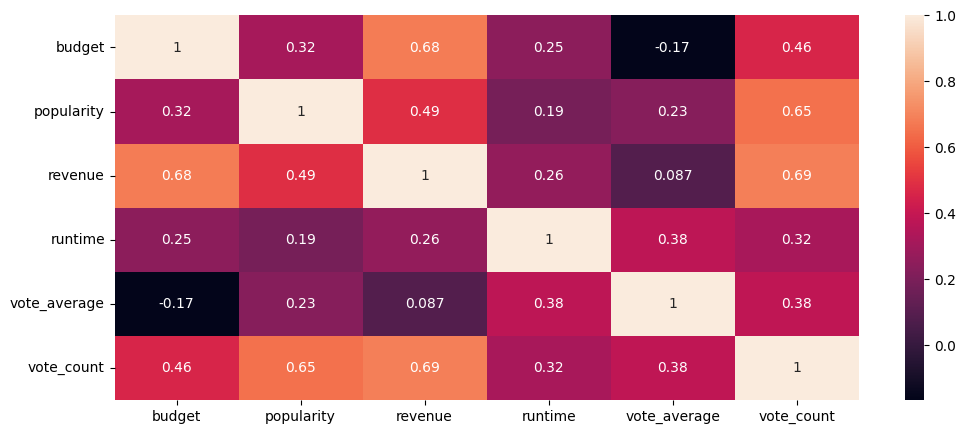

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(correlation_num,cmap="rocket",annot=True)
# Vote average and runtime do not have significant relationships with other columns. Interesting to note that vote average has a negative correlation with budget.

### Which columns have the strongest and weakest correlations with the target variable (Revenue)?

In [ ]:
# The heatmap indicates that revenue has significant positive correlations with vote count, budget, and popularity.

#### How does the correlation matrix change when different subsets of the data are considered (such as by genre, region, year, etc.)?

#### What are the relationships between total revenue and movies produced, popularity, ratings for the top 20 production companies?

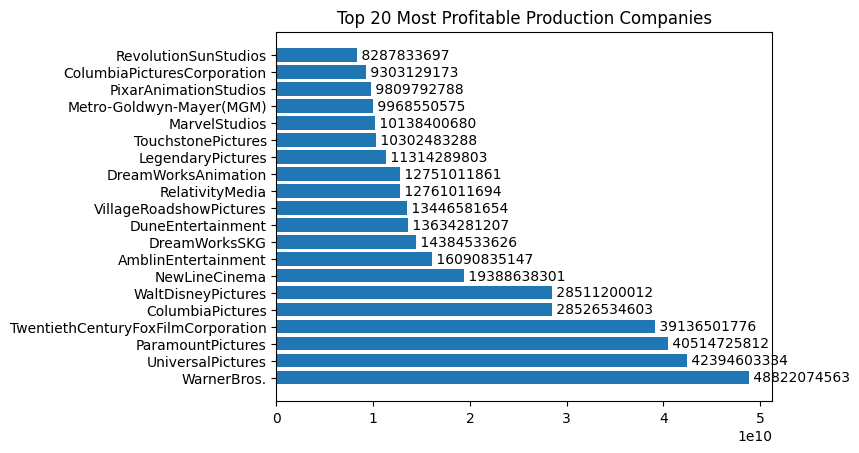

In [ ]:
# plot top 20 companies' total revenues
grouped_revenue = production_companies.groupby('production_companies')['revenue'].sum().sort_values(ascending = False).head(20)
plt.barh(grouped_revenue.index, grouped_revenue.values)
plt.title('Top 20 Most Profitable Production Companies')
for i, count in enumerate(grouped_revenue.values):
    plt.text(count, i, f' {count}', va='center')
plt.show()

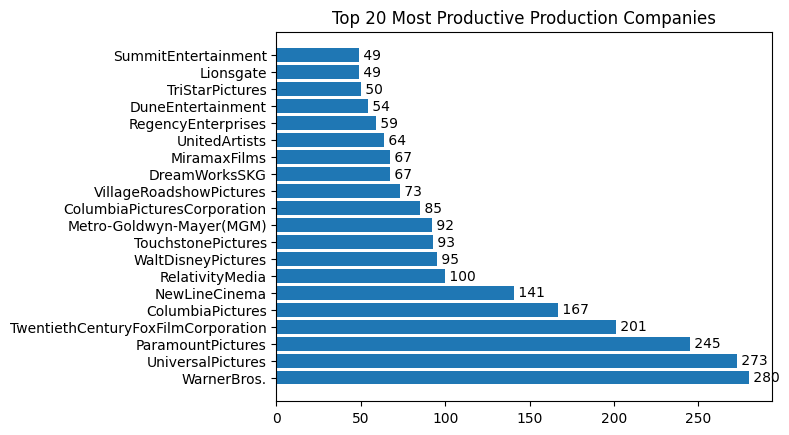

In [ ]:
# plot top 20 companies' total movies produced
total_production = production_companies.groupby('production_companies')['title'].count().sort_values(ascending = False).head(20)
plt.barh(total_production.index, total_production.values)
plt.title('Top 20 Most Productive Production Companies')
for i, count in enumerate(total_production.values):
    plt.text(count, i, f' {count}', va='center')
plt.show()

In [ ]:
# combine the top 20 most profitable production companies with the top 20 most productive ones
top_20 = pd.concat([grouped_revenue, total_production]).index.unique()
top_20_production_companies = production_companies[production_companies['production_companies'].isin(top_20)]
top_20_data = top_20_production_companies.groupby('production_companies').agg({'revenue': 'sum', 'title': 'count'}).reset_index()

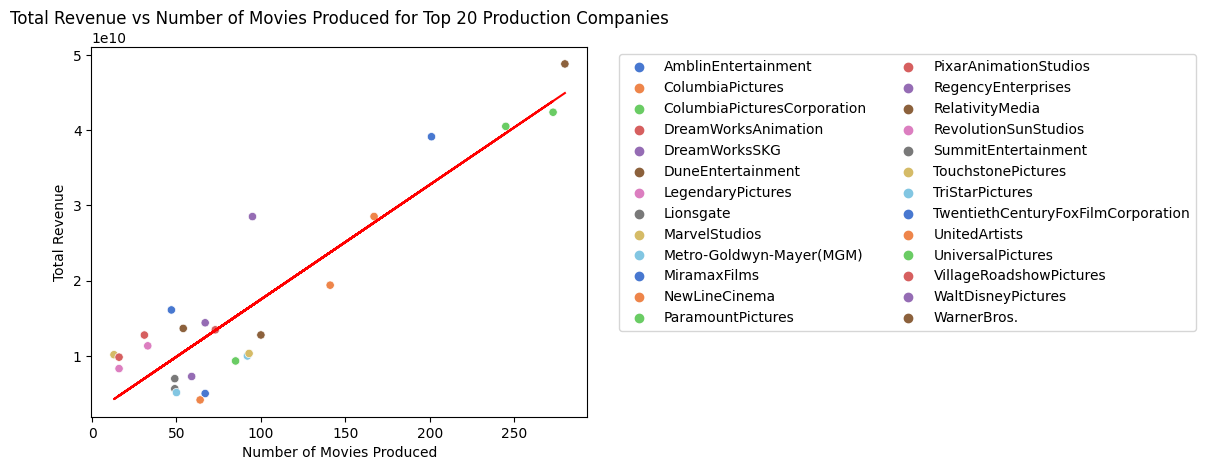

In [ ]:
# plot the relationship between the two and fit a line to the data
sns.scatterplot(data=top_20_data, x='title', y='revenue', hue='production_companies', palette='muted')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', ncol=2)
plt.xlabel('Number of Movies Produced')
plt.ylabel('Total Revenue')
plt.title('Total Revenue vs Number of Movies Produced for Top 20 Production Companies')
slope, intercept, r_value, p_value, std_err = stats.linregress(top_20_data['title'], top_20_data['revenue'])
plt.plot(top_20_data['title'], intercept + slope * top_20_data['title'], 'r', label='fitted line')
plt.show()

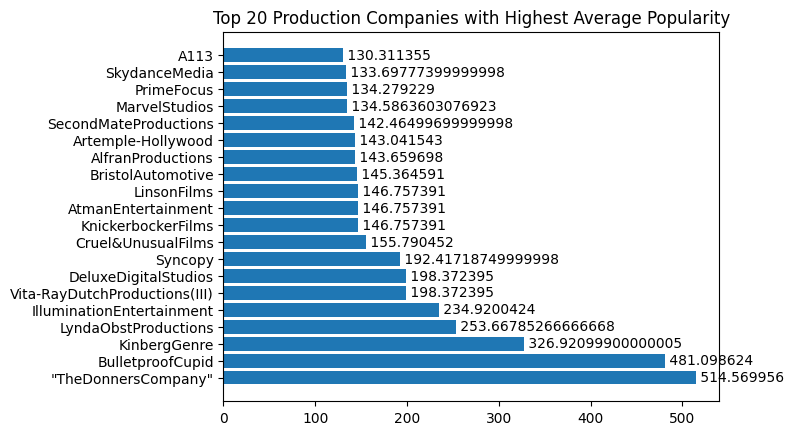

In [ ]:
# plot top 20 companies with highest average popularity
average_popularity = production_companies.groupby('production_companies')['popularity'].mean().sort_values(ascending = False).head(20)
plt.barh(average_popularity.index, average_popularity.values)
plt.title('Top 20 Production Companies with Highest Average Popularity')
for i, count in enumerate(average_popularity.values):
    plt.text(count, i, f' {count}', va='center')
plt.show()

In [ ]:
# calculate the total revenues for the top 20 production companies with highest average popularity
top_20_1 = average_popularity.index
top_20_production_companies_1 = production_companies[production_companies['production_companies'].isin(top_20_1)]
top_20_data_1 = top_20_production_companies_1.groupby('production_companies').agg({'revenue': 'sum', 'popularity': 'mean'}).reset_index()

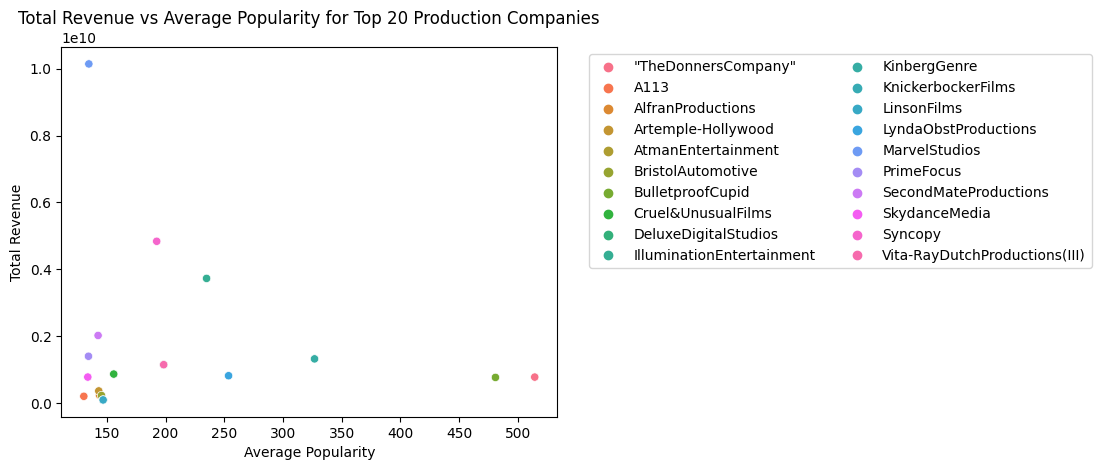

In [ ]:
# plot the data
sns.scatterplot(data=top_20_data_1, x='popularity', y='revenue', hue='production_companies')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', ncol=2)
plt.xlabel('Average Popularity')
plt.ylabel('Total Revenue')
plt.title('Total Revenue vs Average Popularity for Top 20 Production Companies')
plt.show()

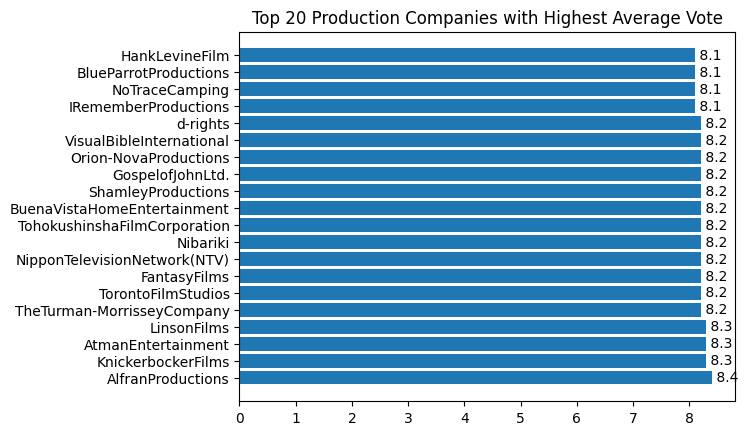

In [ ]:
# plot top 20 companies with highest average vote
average_vote = production_companies.groupby('production_companies')['vote_average'].mean().sort_values(ascending = False).head(20)
plt.barh(average_vote.index, average_vote.values)
plt.title('Top 20 Production Companies with Highest Average Vote')
for i, count in enumerate(average_vote.values):
    plt.text(count, i, f' {count}', va='center')
plt.show()

In [ ]:
# calculate the total revenue for the top 20 production companies with highest average vote
top_20_2 = average_vote.index
top_20_production_companies_2 = production_companies[production_companies['production_companies'].isin(top_20_2)]
top_20_data_2 = top_20_production_companies_2.groupby('production_companies').agg({'revenue': 'sum', 'vote_average': 'mean'}).reset_index()

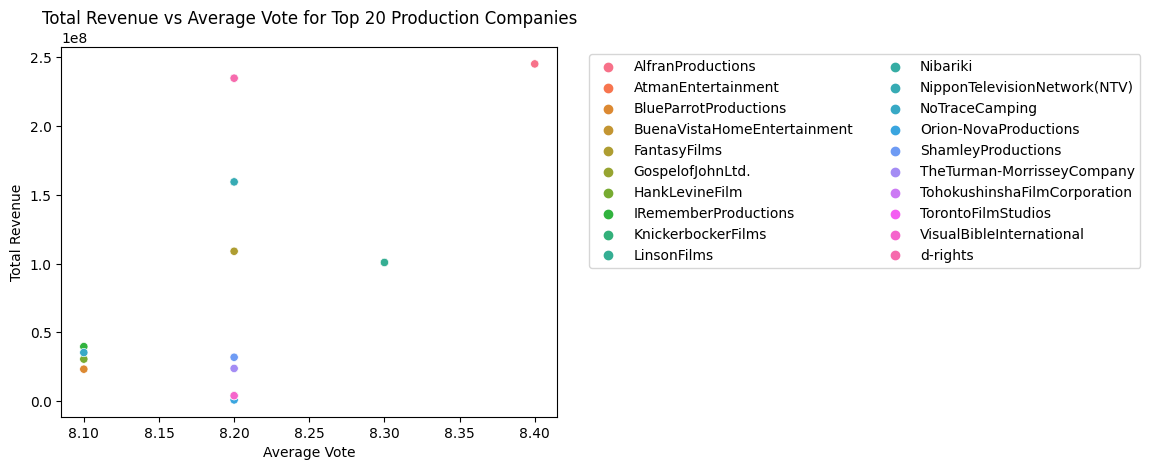

In [ ]:
# plot the data
sns.scatterplot(data=top_20_data_2, x='vote_average', y='revenue', hue='production_companies')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', ncol=2)
plt.xlabel('Average Vote')
plt.ylabel('Total Revenue')
plt.title('Total Revenue vs Average Vote for Top 20 Production Companies')
plt.show()

## 2. Performances:
  - What are the top 10 movies in this dataset based on revenue, popularity, vote average, and ROI?
  - How does the performance of movies vary by genre?
  - Who are the most influential directors in terms of revenue, popularity, and ratings?
  - Who are the top producers with highest revenue and profits earned?
  - Word Cloud for top 200 actors

#### What are the top 10 movies based on revenue, popularity, vote average, and ROI?

In [36]:
# top 10 movies by revenue
revenue10=movies.sort_values(by='revenue',ascending=False).head(10)
revenue10

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
25,200000000,"Drama,Romance,Thriller",597,en,100.025899,"ParamountPictures,TwentiethCenturyFoxFilmCorpo...",UnitedStatesofAmerica,1997-11-18,1845034188,194.0,Titanic,7.5,7562
16,220000000,"ScienceFiction,Action,Adventure",24428,en,144.448633,"ParamountPictures,MarvelStudios",UnitedStatesofAmerica,2012-04-25,1519557910,143.0,The Avengers,7.4,11776
28,150000000,"Action,Adventure,ScienceFiction,Thriller",135397,en,418.708552,"UniversalStudios,AmblinEntertainment,Legendary...",UnitedStatesofAmerica,2015-06-09,1513528810,124.0,Jurassic World,6.5,8662
44,190000000,Action,168259,en,102.322217,"UniversalPictures,OriginalFilm,FujiTelevisionN...","Japan,UnitedStatesofAmerica",2015-04-01,1506249360,137.0,Furious 7,7.3,4176
7,280000000,"Action,Adventure,ScienceFiction",99861,en,134.279229,"MarvelStudios,PrimeFocus,RevolutionSunStudios",UnitedStatesofAmerica,2015-04-22,1405403694,141.0,Avengers: Age of Ultron,7.3,6767
124,150000000,"Animation,Adventure,Family",109445,en,165.125366,"WaltDisneyPictures,WaltDisneyAnimationStudios",UnitedStatesofAmerica,2013-11-27,1274219009,102.0,Frozen,7.3,5295
31,200000000,"Action,Adventure,ScienceFiction",68721,en,77.682080,MarvelStudios,"China,UnitedStatesofAmerica",2013-04-18,1215439994,130.0,Iron Man 3,6.8,8806
546,74000000,"Family,Animation,Adventure,Comedy",211672,en,875.581305,"UniversalPictures,IlluminationEntertainment",UnitedStatesofAmerica,2015-06-17,1156730962,91.0,Minions,6.4,4571
26,250000000,"Adventure,Action,ScienceFiction",271110,en,198.372395,"StudioBabelsberg,MarvelStudios,WaltDisneyStudi...",UnitedStatesofAmerica,2016-04-27,1153304495,147.0,Captain America: Civil War,7.1,7241


In [37]:
# top 10 movies by popularity
popu10=movies.sort_values(by='popularity',ascending=False).head(10)
popu10

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
546,74000000,"Family,Animation,Adventure,Comedy",211672,en,875.581305,"UniversalPictures,IlluminationEntertainment",UnitedStatesofAmerica,2015-06-17,1156730962,91.0,Minions,6.4,4571
95,165000000,"Adventure,Drama,ScienceFiction",157336,en,724.247784,"ParamountPictures,LegendaryPictures,WarnerBros...","Canada,UnitedStatesofAmerica,UnitedKingdom",2014-11-05,675120017,169.0,Interstellar,8.1,10867
788,58000000,"Action,Adventure,Comedy",293660,en,514.569956,"TwentiethCenturyFoxFilmCorporation,MarvelEnter...",UnitedStatesofAmerica,2016-02-09,783112979,108.0,Deadpool,7.4,10995
94,170000000,"Action,ScienceFiction,Adventure",118340,en,481.098624,"MarvelStudios,MovingPictureCompany(MPC),Bullet...","UnitedKingdom,UnitedStatesofAmerica",2014-07-30,773328629,121.0,Guardians of the Galaxy,7.9,9742
127,150000000,"Action,Adventure,ScienceFiction,Thriller",76341,en,434.278564,"VillageRoadshowPictures,KennedyMillerProductio...","Australia,UnitedStatesofAmerica",2015-05-13,378858340,120.0,Mad Max: Fury Road,7.2,9427
28,150000000,"Action,Adventure,ScienceFiction,Thriller",135397,en,418.708552,"UniversalStudios,AmblinEntertainment,Legendary...",UnitedStatesofAmerica,2015-06-09,1513528810,124.0,Jurassic World,6.5,8662
199,140000000,"Adventure,Fantasy,Action",22,en,271.972889,"WaltDisneyPictures,JerryBruckheimerFilms",UnitedStatesofAmerica,2003-07-09,655011224,143.0,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985
82,170000000,"ScienceFiction,Action,Drama,Thriller",119450,en,243.791743,"IngeniousMedia,CherninEntertainment,TSGEnterta...",UnitedStatesofAmerica,2014-06-26,710644566,130.0,Dawn of the Planet of the Apes,7.3,4410
200,125000000,"ScienceFiction,Adventure,Thriller",131631,en,206.227151,"Lionsgate,ColorForce",UnitedStatesofAmerica,2014-11-18,752100229,123.0,The Hunger Games: Mockingjay - Part 1,6.6,5584
88,165000000,"Adventure,Family,Animation,Action,Comedy",177572,en,203.734590,"WaltDisneyPictures,WaltDisneyAnimationStudios",UnitedStatesofAmerica,2014-10-24,652105443,102.0,Big Hero 6,7.8,6135


In [38]:
# top 10 movies by vote average
voteavg10=movies.sort_values(by='vote_average',ascending=False).head(10)
voteavg10

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
2970,10500000,"Drama,Comedy",88641,en,0.037073,NelsonEntertainment,UnitedStatesofAmerica,1994-09-02,123509,99.0,There Goes My Baby,8.5,2
1881,25000000,"Drama,Crime",278,en,136.747729,CastleRockEntertainment,UnitedStatesofAmerica,1994-09-23,28341469,142.0,The Shawshank Redemption,8.5,8205
3337,6000000,"Drama,Crime",238,en,143.659698,"ParamountPictures,AlfranProductions",UnitedStatesofAmerica,1972-03-14,245066411,175.0,The Godfather,8.4,5893
662,63000000,Drama,550,en,146.757391,"RegencyEnterprises,Fox2000Pictures,TaurusFilm,...","Germany,UnitedStatesofAmerica",1999-10-15,100853753,139.0,Fight Club,8.3,9413
2731,13000000,"Drama,Crime",240,en,105.792936,"ParamountPictures,TheCoppolaCompany",UnitedStatesofAmerica,1974-12-20,47542841,200.0,The Godfather: Part II,8.3,3338
3865,3300000,Drama,244786,en,192.528841,"BoldFilms,BlumhouseProductions,RightofWayFilms",UnitedStatesofAmerica,2014-10-10,13092000,105.0,Whiplash,8.3,4254
1818,22000000,"Drama,History,War",424,en,104.469351,"UniversalPictures,AmblinEntertainment",UnitedStatesofAmerica,1993-11-29,321365567,195.0,Schindler's List,8.3,4329
3232,8000000,"Thriller,Crime",680,en,121.463076,"MiramaxFilms,ABandApart,JerseyFilms",UnitedStatesofAmerica,1994-10-08,213928762,154.0,Pulp Fiction,8.3,8428
2294,15000000,"Fantasy,Adventure,Animation,Family",129,ja,118.968562,StudioGhibli,Japan,2001-07-20,274925095,125.0,Spirited Away,8.3,3840
2247,26500000,"Adventure,Fantasy,Animation",128,ja,60.732738,"MiramaxFilms,StudioGhibli,Nibariki,NipponTelev...",Japan,1997-07-12,159375308,134.0,Princess Mononoke,8.2,1983


In [39]:
# top 10 movies by ROI
movies['ROI']=(movies['revenue']-movies['budget'])/movies['budget'] # add a column named ROI
roi10=movies.sort_values(by='ROI',ascending=False).head(10)
roi10

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,ROI
4238,1,"Drama,Comedy",3082,en,28.276480,"UnitedArtists,CharlesChaplinProductions",UnitedStatesofAmerica,1936-02-05,8500000,87.0,Modern Times,8.1,856,8.499999e+06
3137,10,"Horror,Thriller",78383,en,10.013629,"LionsGate,LionsGateEntertainments",UnitedStatesofAmerica,2013-09-28,10000000,99.0,Nurse 3-D,4.9,119,9.999990e+05
4577,15000,"Horror,Mystery",23827,en,47.456823,"BlumhouseProductions,SolanaFilms",UnitedStatesofAmerica,2007-09-14,193355800,86.0,Paranormal Activity,5.9,1316,1.288939e+04
4496,60000,"Horror,Mystery",2667,en,41.690578,"ArtisanEntertainment,HaxanFilms",UnitedStatesofAmerica,1999-07-14,248000000,81.0,The Blair Witch Project,6.3,1055,4.132333e+03
4724,10000,"Drama,Fantasy,Horror,ScienceFiction",985,en,20.399578,"AmericanFilmInstitute(AFI),LibraFilms",UnitedStatesofAmerica,1977-03-19,7000000,89.0,Eraserhead,7.5,485,6.990000e+02
4788,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110,4.990000e+02
4742,65000,"Documentary,Comedy,Drama",9372,en,10.400603,KathburPictures,UnitedStatesofAmerica,2004-01-17,28575078,100.0,Super Size Me,6.6,506,4.386166e+02
4723,100000,"Horror,Thriller",299245,en,18.045782,"NewLineCinema,BlumhouseProductions,Management3...",UnitedStatesofAmerica,2015-07-10,42664410,87.0,The Gallows,4.9,361,4.256441e+02
4514,130000,"Drama,Thriller",83,en,15.611857,PlungePicturesLLC,UnitedStatesofAmerica,2004-08-06,54667954,79.0,Open Water,5.4,315,4.195227e+02
3159,85000,Horror,30497,en,29.262427,"NewLineCinema,Vortex",UnitedStatesofAmerica,1974-10-01,30859000,83.0,The Texas Chain Saw Massacre,7.2,590,3.620471e+02


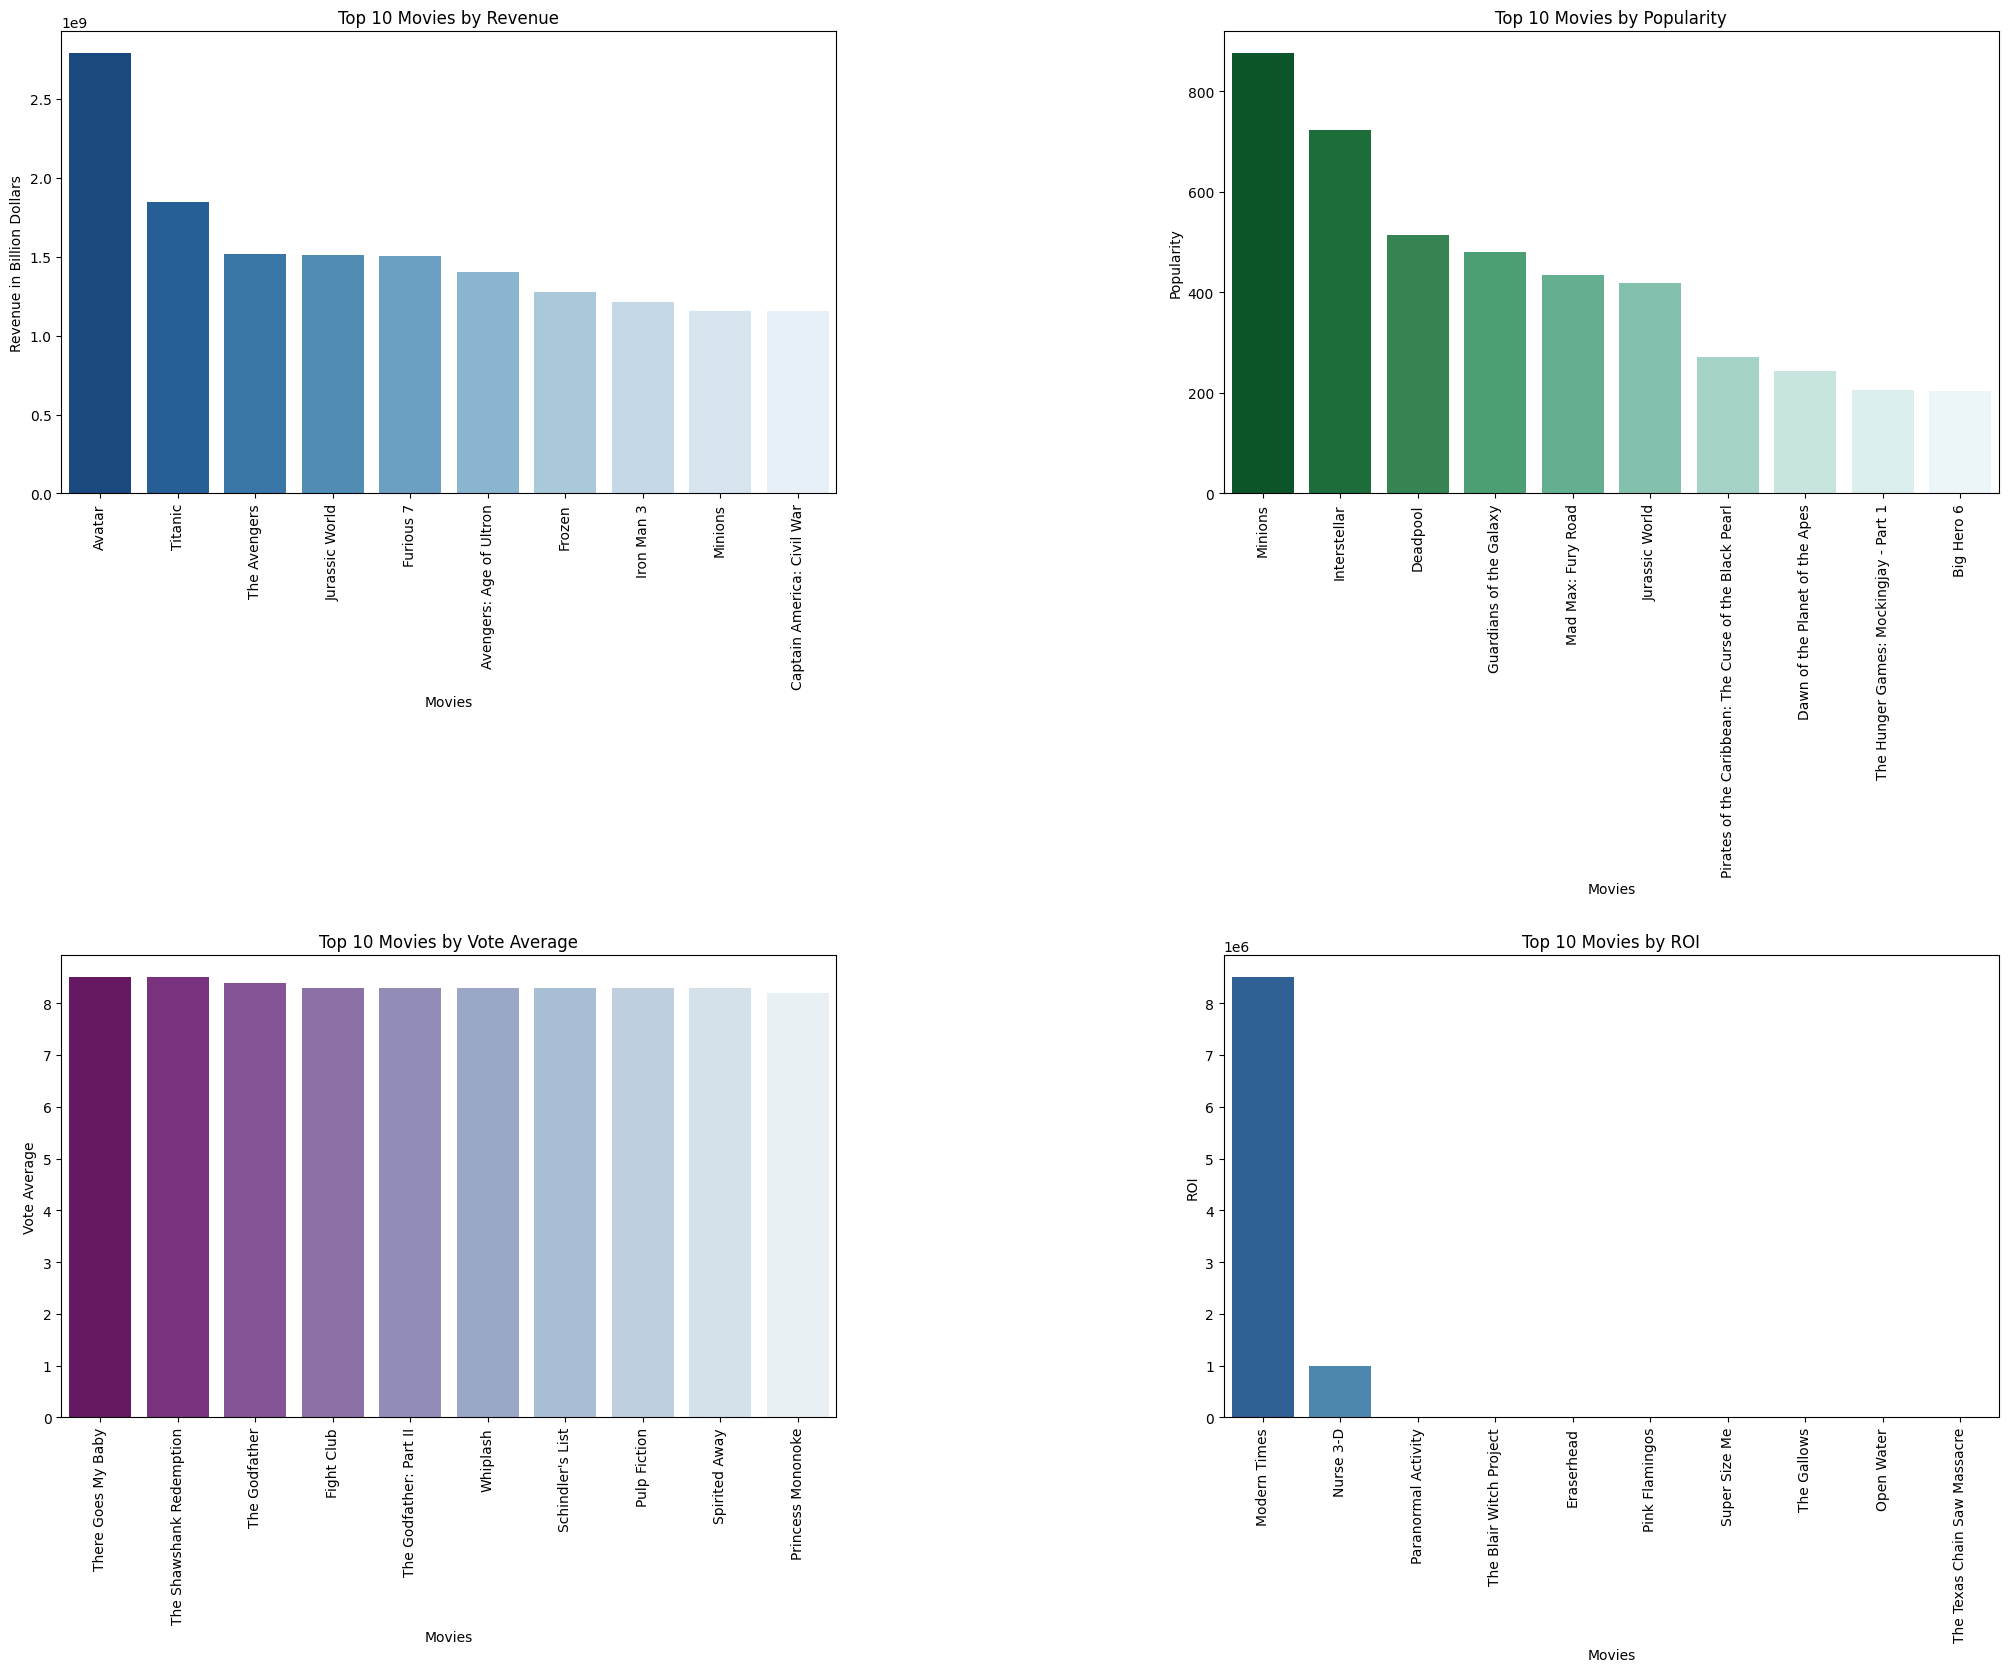

In [40]:
from matplotlib.ticker import MultipleLocator
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(25, 18))

fig_revenue10=sns.barplot(data=revenue10,x='title',y='revenue',ax=axs[0,0],palette='Blues_r')
axs[0,0].set_title('Top 10 Movies by Revenue')
axs[0,0].set_ylabel('Revenue in Billion Dollars')
axs[0,0].set_xlabel('Movies')
axs[0,0].tick_params(axis='x',rotation=90)

fig_popu10=sns.barplot(data=popu10,x='title',y='popularity',ax=axs[0,1],palette='BuGn_r')
axs[0,1].set_title('Top 10 Movies by Popularity')
axs[0,1].set_ylabel('Popularity')
axs[0,1].set_xlabel('Movies')
axs[0,1].tick_params(axis='x',rotation=90)

fig_voteavg10=sns.barplot(data=voteavg10,x='title',y='vote_average',ax=axs[1,0],palette='BuPu_r')
axs[1,0].set_title('Top 10 Movies by Vote Average')
axs[1,0].set_ylabel('Vote Average')
axs[1,0].set_xlabel('Movies')
axs[1,0].tick_params(axis='x',rotation=90)

fig_roi10=sns.barplot(data=roi10,x='title',y='ROI',ax=axs[1,1],palette='RdBu_r')
axs[1,1].set_title('Top 10 Movies by ROI')
axs[1,1].set_ylabel('ROI')
axs[1,1].set_xlabel('Movies')
axs[1,1].tick_params(axis='x',rotation=90)

plt.subplots_adjust(wspace=0.5,hspace=1)

#### How does the performance of movies vary by genre?

In [41]:
# group by genre and calculate cumulative revenue
genre_revenue=genres.groupby('genres').agg({'revenue': 'sum'}).sort_values(by='revenue',ascending=False).reset_index()
genre_revenue

,genres,revenue
0,Adventure,163609079304
1,Action,162258735035
2,Comedy,120224452148
3,Drama,118018227550
4,Thriller,102985523124
5,Family,82376416489
6,Fantasy,81498442010
7,ScienceFiction,81354450015
8,Romance,53069028748
9,Animation,52429331328


In [42]:
# group by genre and calculate cumulative popularity
genre_popu=genres.groupby('genres').agg({'popularity': 'sum'}).sort_values(by='popularity',ascending=False).reset_index()
genre_popu

,genres,popularity
0,Drama,35546.177872
1,Action,34140.055221
2,Adventure,30024.215779
3,Thriller,28690.992987
4,Comedy,27195.634213
5,ScienceFiction,18648.295620
6,Fantasy,14671.067874
7,Crime,14547.458137
8,Family,13269.883602
9,Romance,12290.018443


In [43]:
# group by genre and calculate average vote average
genre_voteavg=genres.groupby('genres').agg({'vote_average': 'mean'}).sort_values(by='vote_average',ascending=False).reset_index()
genre_voteavg

,genres,vote_average
0,Documentary,6.853125
1,History,6.805594
2,War,6.792500
3,Western,6.671930
4,Drama,6.606073
5,Foreign,6.566667
6,Music,6.520909
7,Animation,6.477419
8,Crime,6.445367
9,Mystery,6.364151


In [44]:
genres['ROI']=(genres['revenue']-genres['budget'])/genres['budget'] # add a column named ROI to genres dataframe
# group by genre and calculate cumulative ROI
genre_roi=genres.groupby('genres').agg({'ROI': 'sum'}).sort_values(by='ROI',ascending=False).reset_index()
genre_roi

,genres,ROI
0,Drama,8.506679e+06
1,Comedy,8.504609e+06
2,Horror,1.021372e+06
3,Thriller,1.004094e+06
4,Mystery,1.769189e+04
5,Action,2.369518e+03
6,Romance,2.326517e+03
7,Adventure,2.288128e+03
8,ScienceFiction,2.124181e+03
9,Crime,1.686520e+03


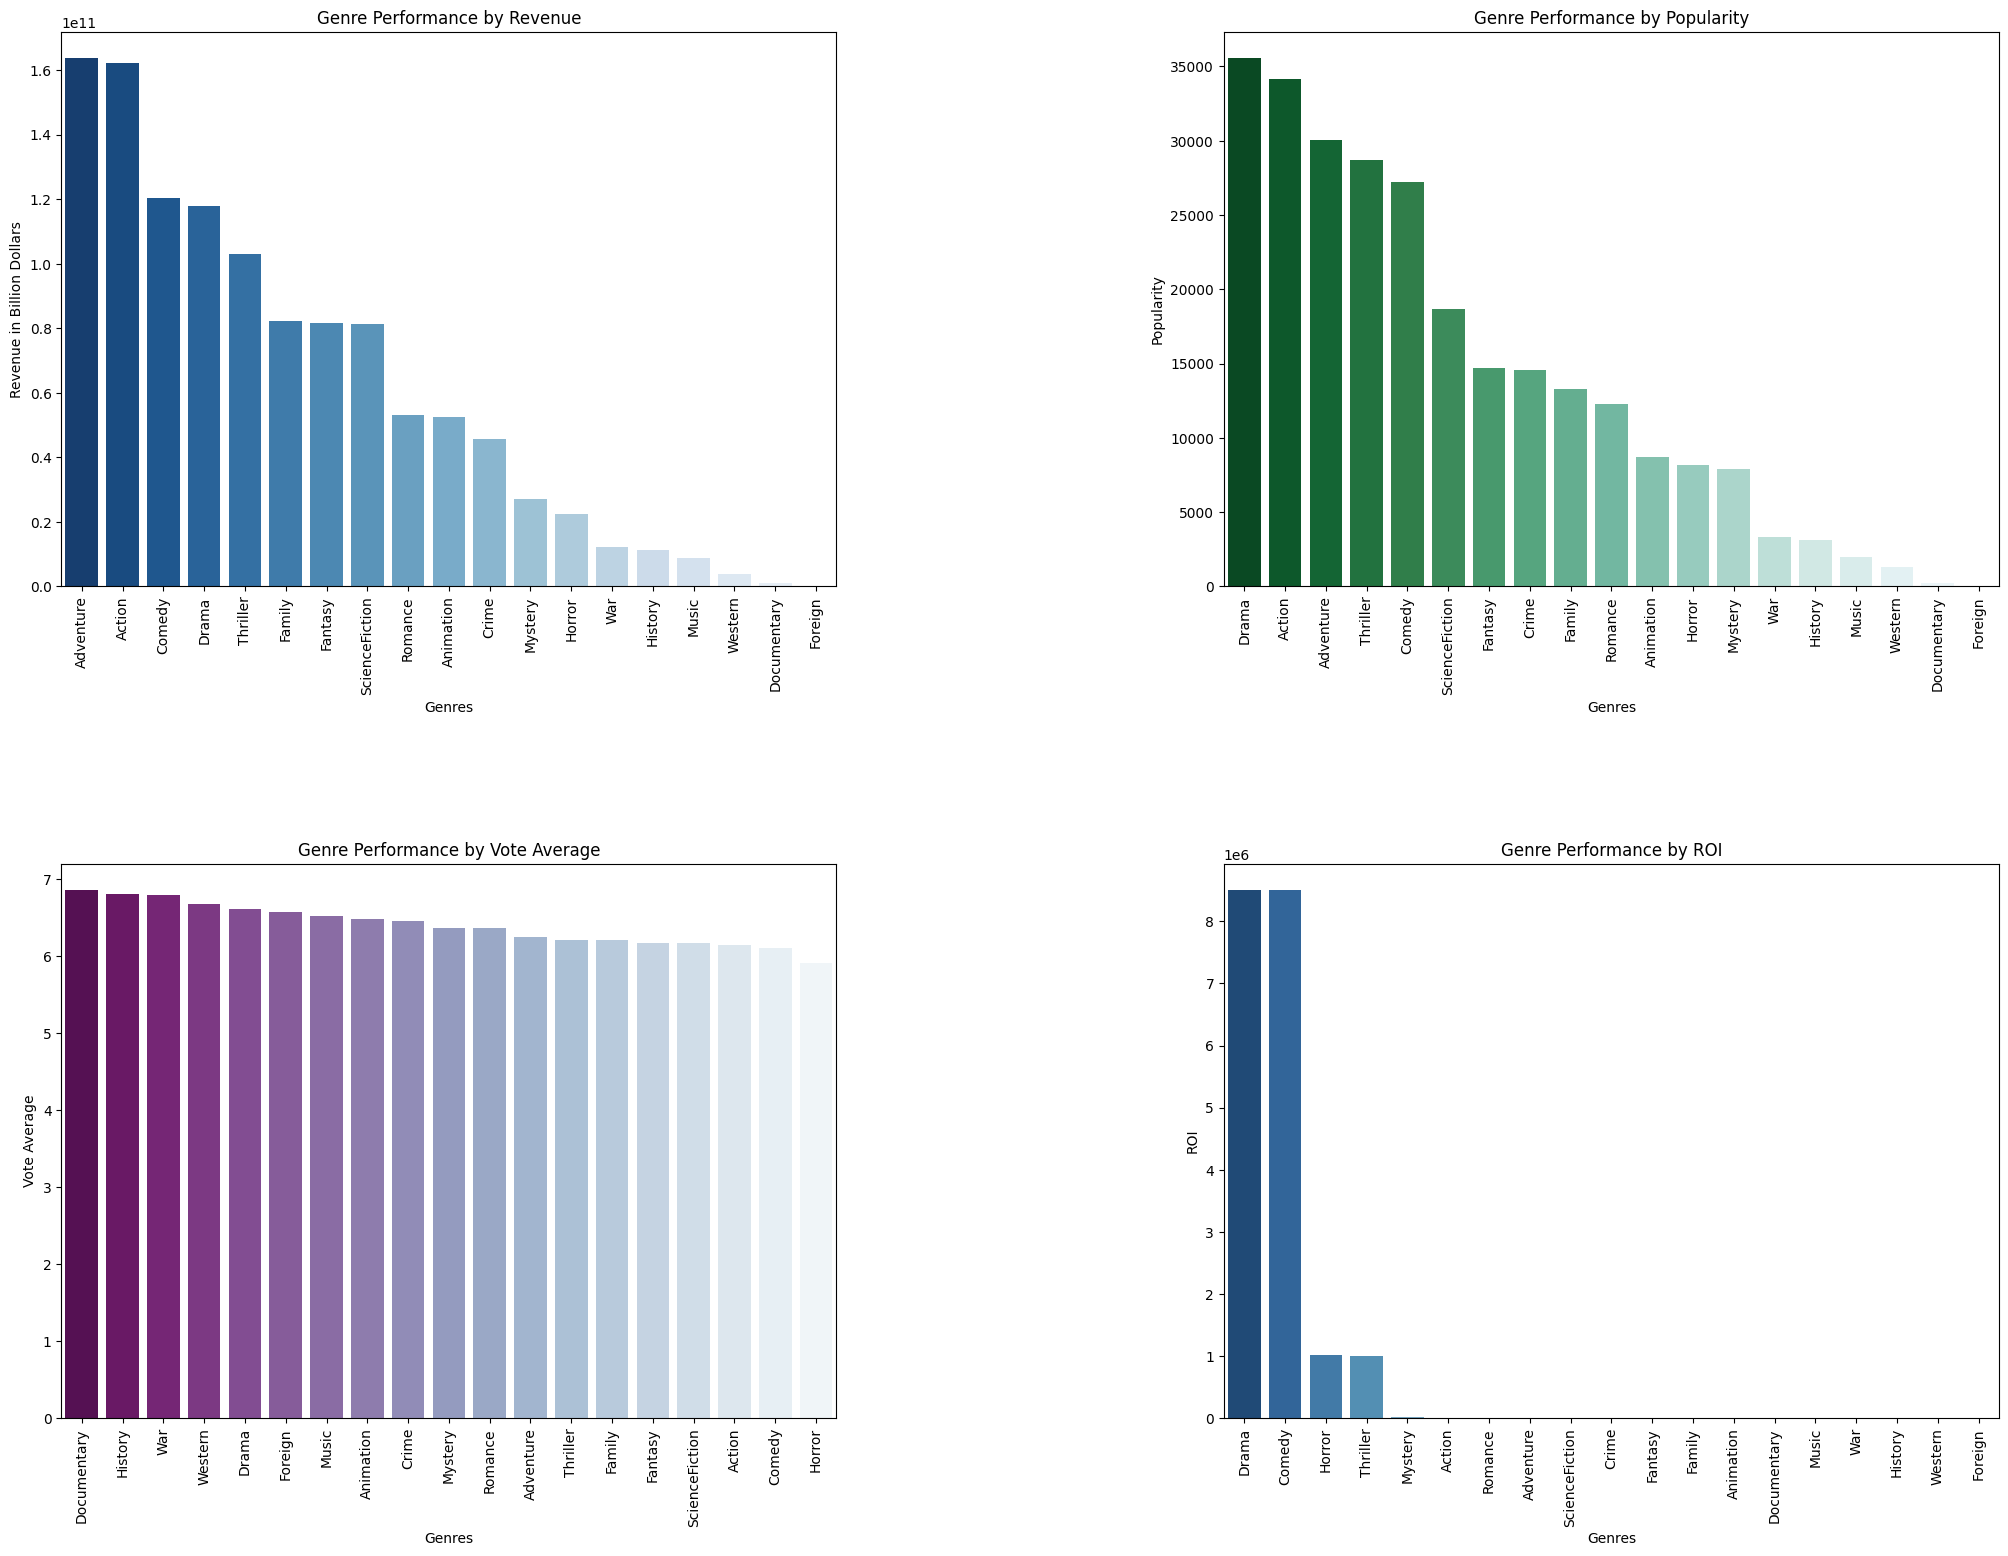

In [45]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(25, 18))

fig_genre_revenue=sns.barplot(data=genre_revenue,x='genres',y='revenue',ax=axs[0,0],palette='Blues_r')
axs[0,0].set_title('Genre Performance by Revenue')
axs[0,0].set_ylabel('Revenue in Billion Dollars')
axs[0,0].set_xlabel('Genres')
axs[0,0].tick_params(axis='x',rotation=90)

fig_genre_popu=sns.barplot(data=genre_popu,x='genres',y='popularity',ax=axs[0,1],palette='BuGn_r')
axs[0,1].set_title('Genre Performance by Popularity')
axs[0,1].set_ylabel('Popularity')
axs[0,1].set_xlabel('Genres')
axs[0,1].tick_params(axis='x',rotation=90)

fig_genre_voteavg=sns.barplot(data=genre_voteavg,x='genres',y='vote_average',ax=axs[1,0],palette='BuPu_r')
axs[1,0].set_title('Genre Performance by Vote Average')
axs[1,0].set_ylabel('Vote Average')
axs[1,0].set_xlabel('Genres')
axs[1,0].tick_params(axis='x',rotation=90)

fig_genre_roi=sns.barplot(data=genre_roi,x='genres',y='ROI',ax=axs[1,1],palette='RdBu_r')
axs[1,1].set_title('Genre Performance by ROI')
axs[1,1].set_ylabel('ROI')
axs[1,1].set_xlabel('Genres')
axs[1,1].tick_params(axis='x',rotation=90)

plt.subplots_adjust(wspace=0.5,hspace=0.5)

#### Who are the most influential directors in terms of revenue, popularity, and ratings?

In [51]:
# combine movies and credits dataframes
mergedata=pd.merge(left=movies,right=credits,how='inner',on='id')
mergedata

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,ROI,Director,Producers,Actors
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800,10.763566,James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2.203333,Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24","UnitedKingdom,UnitedStatesofAmerica",2015-10-26,880674609,148.0,Spectre,6.3,4466,2.594590,Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action,Crime,Drama,Thriller",49026,en,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,3.339756,Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action,Adventure,ScienceFiction",49529,en,43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,John Carter,6.1,2124,0.092843,Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,27000,Comedy,2292,en,19.748658,"MiramaxFilms,ViewAskewProductions",UnitedStatesofAmerica,1994-09-13,3151130,92.0,Clerks,7.4,755,115.708519,Kevin Smith,"Kevin Smith, Scott Mosier","""Brian OHalloran"", Jeff Anderson, Jason Mewes,..."
3179,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110,499.000000,John Waters,John Waters,"Divine, David Lochary, Mary Vivian Pearce, Min..."
3180,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63,3.950000,Kiyoshi Kurosawa,,"Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki,..."
3181,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658,59.680000,Shane Carruth,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A..."


In [52]:
# expand the dataframe to keep records for individual directors
director=mergedata.assign(Director=mergedata['Director'].str.split(',')).explode('Director')
director

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,ROI,Director,Producers,Actors
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800,10.763566,James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2.203333,Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24","UnitedKingdom,UnitedStatesofAmerica",2015-10-26,880674609,148.0,Spectre,6.3,4466,2.594590,Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action,Crime,Drama,Thriller",49026,en,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,3.339756,Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action,Adventure,ScienceFiction",49529,en,43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,John Carter,6.1,2124,0.092843,Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,27000,Comedy,2292,en,19.748658,"MiramaxFilms,ViewAskewProductions",UnitedStatesofAmerica,1994-09-13,3151130,92.0,Clerks,7.4,755,115.708519,Kevin Smith,"Kevin Smith, Scott Mosier","""Brian OHalloran"", Jeff Anderson, Jason Mewes,..."
3179,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110,499.000000,John Waters,John Waters,"Divine, David Lochary, Mary Vivian Pearce, Min..."
3180,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63,3.950000,Kiyoshi Kurosawa,,"Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki,..."
3181,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658,59.680000,Shane Carruth,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A..."


In [53]:
# top 10 directors by revenue, popularity, and vote average
director_revenue10=director.groupby('Director')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()
director_popu10=director.groupby('Director')['popularity'].sum().sort_values(ascending=False).head(10).reset_index()
director_voteavg10=director.groupby('Director')['vote_average'].sum().sort_values(ascending=False).head(10).reset_index()

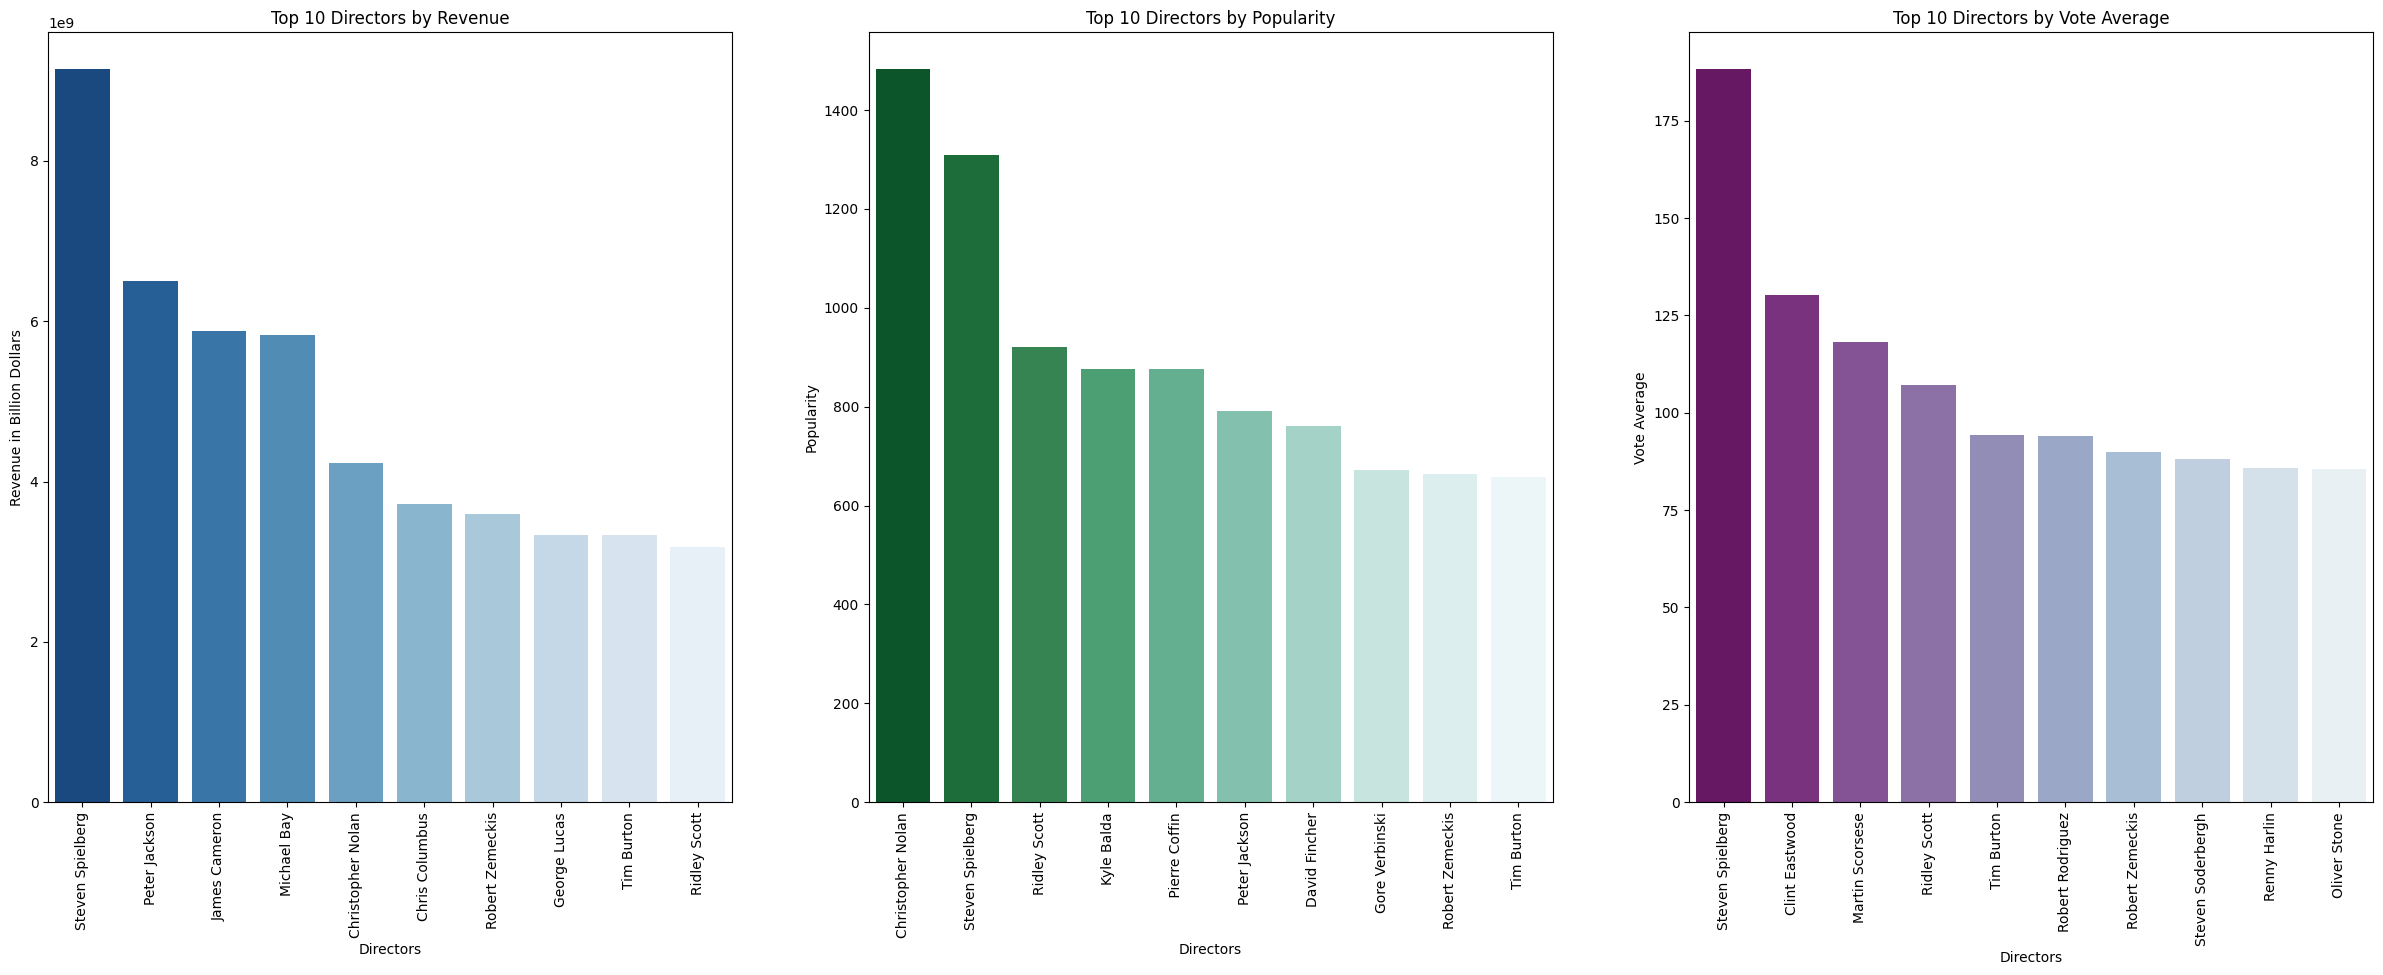

In [54]:
# barplots showing top 10 directors in terms of revenue, popularity and ratings
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(30, 10))

fig_director_revenue10=sns.barplot(data=director_revenue10,x='Director',y='revenue',ax=axs[0],palette='Blues_r')
axs[0].set_title('Top 10 Directors by Revenue')
axs[0].set_ylabel('Revenue in Billion Dollars')
axs[0].set_xlabel('Directors')
axs[0].tick_params(axis='x',rotation=90)

fig_director_popu10=sns.barplot(data=director_popu10,x='Director',y='popularity',ax=axs[1],palette='BuGn_r')
axs[1].set_title('Top 10 Directors by Popularity')
axs[1].set_ylabel('Popularity')
axs[1].set_xlabel('Directors')
axs[1].tick_params(axis='x',rotation=90)

fig_director_voteavg10=sns.barplot(data=director_voteavg10,x='Director',y='vote_average',ax=axs[2],palette='BuPu_r')
axs[2].set_title('Top 10 Directors by Vote Average')
axs[2].set_ylabel('Vote Average')
axs[2].set_xlabel('Directors')
axs[2].tick_params(axis='x',rotation=90)

#### Who are the top producers with highest revenue and budget?

In [55]:
# create temporary dataframe for Producers, revenue and budget columns
tempx = mergedata[['Producers','revenue','budget']]
tempx = tempx.groupby('Producers').sum()
tempx.sort_values(by=['revenue'], ascending=False, inplace=True)
tempx = tempx[1:21]
tempx.head(2)

,revenue,budget
Producers,,
Kevin Feige,7750439877,1570000000
"James Cameron, Jon Landau",4632999275,437000000


Text(0, 0.5, 'Dollars in Billions')

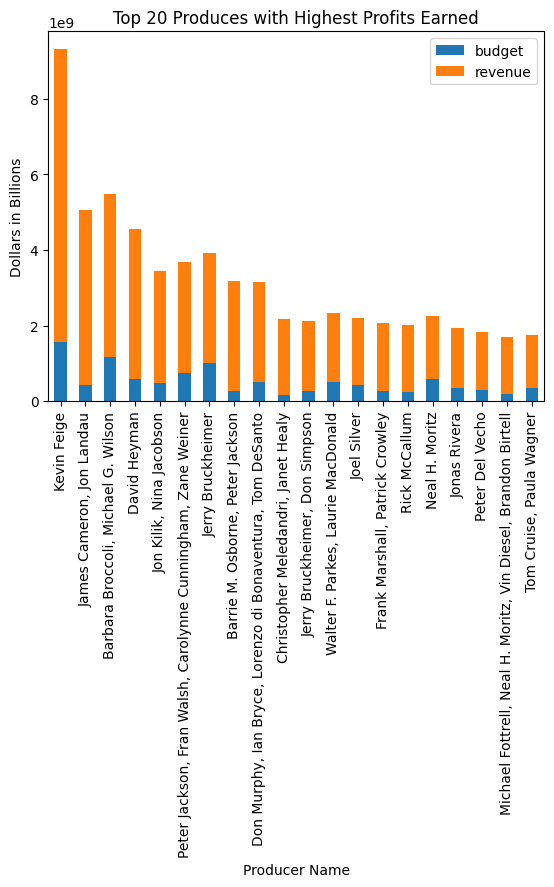

In [56]:
# Stacked Bar chart for Producers with highest budget and revenue
tempx[['budget', 'revenue']].plot(kind="bar", stacked=True)
plt.title("Top 20 Produces with Highest Profits Earned")
plt.xlabel("Producer Name")
plt.ylabel("Dollars in Billions")

#### Word Cloud for top 200 actors

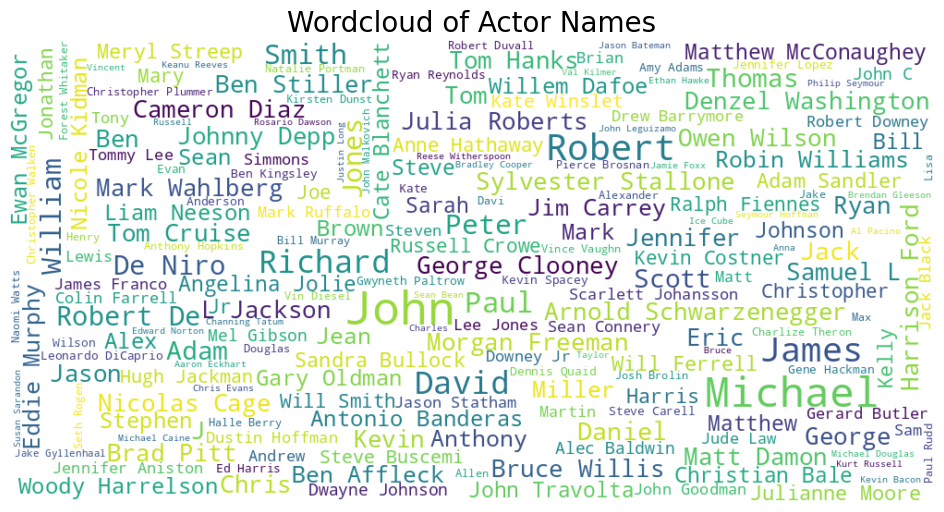

In [57]:
# WordCloud with 200 actor names
text = " ".join([" ".join(key.split(",")) for key in mergedata['Actors']]).strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=1000, height=500, max_font_size=50,
                      max_words=200).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud, interpolation='bilinear', aspect="equal")
plt.title("Wordcloud of Actor Names", fontsize=20)
plt.axis("off")
plt.show()

## 3. Comparisons:
  - How does the average vote count and vote average differ across genres?
  - What is the relationship between Average Vote Count and Average Ratings by each genre?

#### How does the average vote count and vote average differ across genres?

In [48]:
# Create a copy of the movies dataframe
genres_split = movies.copy()

# Split genres column into separate rows
genres_split['genres'] = genres_split['genres'].str.split(',')
genres_split = genres_split.explode('genres')
genres_split['genres'] = genres_split['genres'].str.strip()

# Group by genre and calculate mean values for vote_count and vote_average
genre_grouped = genres_split.groupby('genres').agg({'vote_count': 'mean', 'vote_average': 'mean'}).reset_index()

# Display the results
print(genre_grouped.sort_values(by='vote_count', ascending=True).to_string(index=False))

        genres  vote_count  vote_average
       Foreign    5.333333      6.566667
   Documentary  150.781250      6.853125
         Music  429.209091      6.520909
       History  642.118881      6.805594
       Romance  660.007092      6.355496
        Horror  697.756024      5.902410
        Comedy  765.178637      6.094843
         Drama  801.737288      6.606073
       Western  811.385965      6.671930
           War  899.500000      6.792500
         Crime  967.552124      6.445367
       Mystery 1003.596226      6.364151
      Thriller 1013.309677      6.209032
        Family 1230.102210      6.200552
        Action 1413.473047      6.135864
     Animation 1536.548387      6.477419
       Fantasy 1607.143695      6.171261
     Adventure 1700.593893      6.242443
ScienceFiction 1737.244186      6.165814


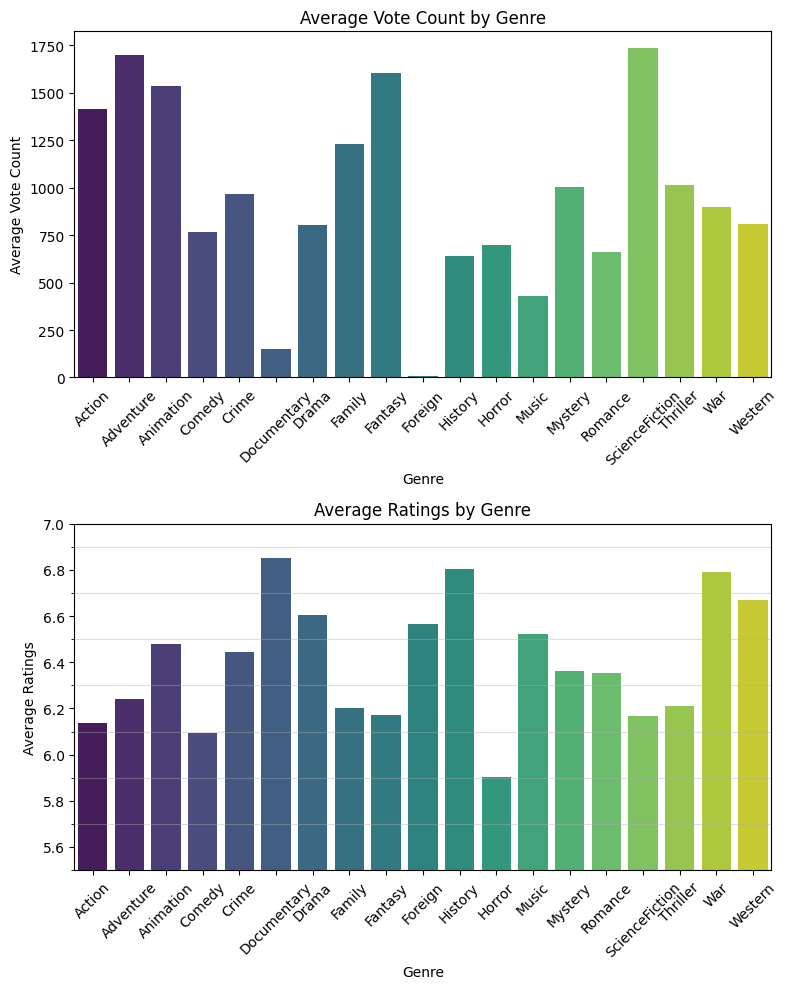

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

sns.barplot(data=genre_grouped, x='genres', y='vote_count', ax=ax[0], palette='viridis')
ax[0].set_title('Average Vote Count by Genre')
ax[0].set_ylabel('Average Vote Count')
ax[0].set_xlabel('Genre')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=genre_grouped, x='genres', y='vote_average', ax=ax[1], palette='viridis')
ax[1].set_title('Average Ratings by Genre')
ax[1].set_ylabel('Average Ratings')
ax[1].set_xlabel('Genre')
ax[1].tick_params(axis='x', rotation=45)

# Custom minor ticks
ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[1].grid(axis='y', which='minor', alpha=0.4)

# Set y-axis limit
ax[1].set_ylim(5.5, 7)

plt.tight_layout()
plt.show()

#### What is the relationship between average vote count and average ratings by each genre?

Pearson correlation coefficient: -0.50


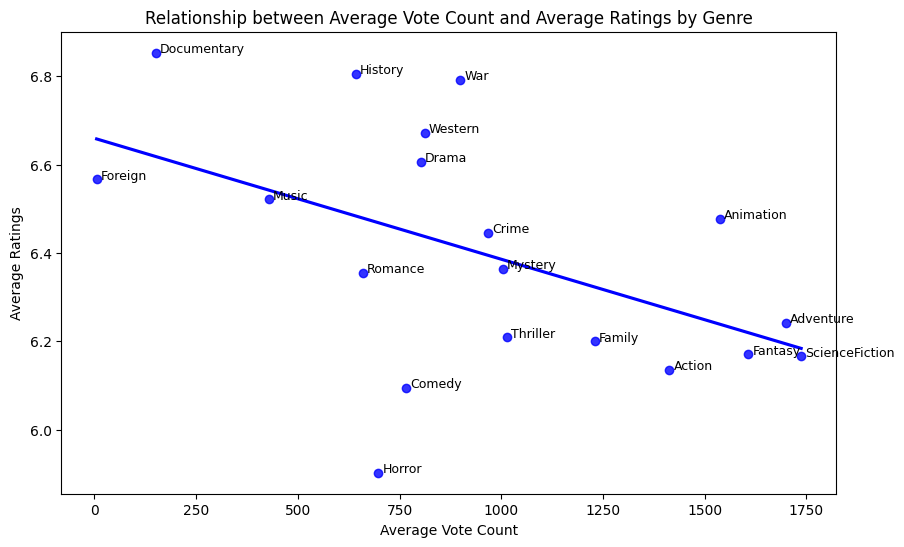

In [50]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))

# Plot the scatter plot with a regression line
sns.regplot(data=genre_grouped, x='vote_count', y='vote_average', color='blue', ci=None)

plt.title('Relationship between Average Vote Count and Average Ratings by Genre')
plt.xlabel('Average Vote Count')
plt.ylabel('Average Ratings')

# Add genre labels to each point
for index, row in genre_grouped.iterrows():
    plt.text(row['vote_count'] + 10, row['vote_average'], row['genres'], fontsize=9)

# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(genre_grouped['vote_count'], genre_grouped['vote_average'])
print(f'Pearson correlation coefficient: {correlation:.2f}')

plt.show()

## 4. Trends:
  - What are the trends in movie budgets, revenues, and popularity over time? Are there any noticeable patterns or shifts in the industry?
  - How has the number of movies released each year changed over time?
  - What are the trends in movie runtime over time? Are movies getting longer or shorter? How does runtime affect revenue, popularity, and ratings?

#### What are the trends in movie budgets, revenues, and popularity over time? Are there any noticeable patterns or shifts in the industry?


<ipython-input-120-fbe812f01c0b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = movies.groupby('release_year').mean().reset_index()


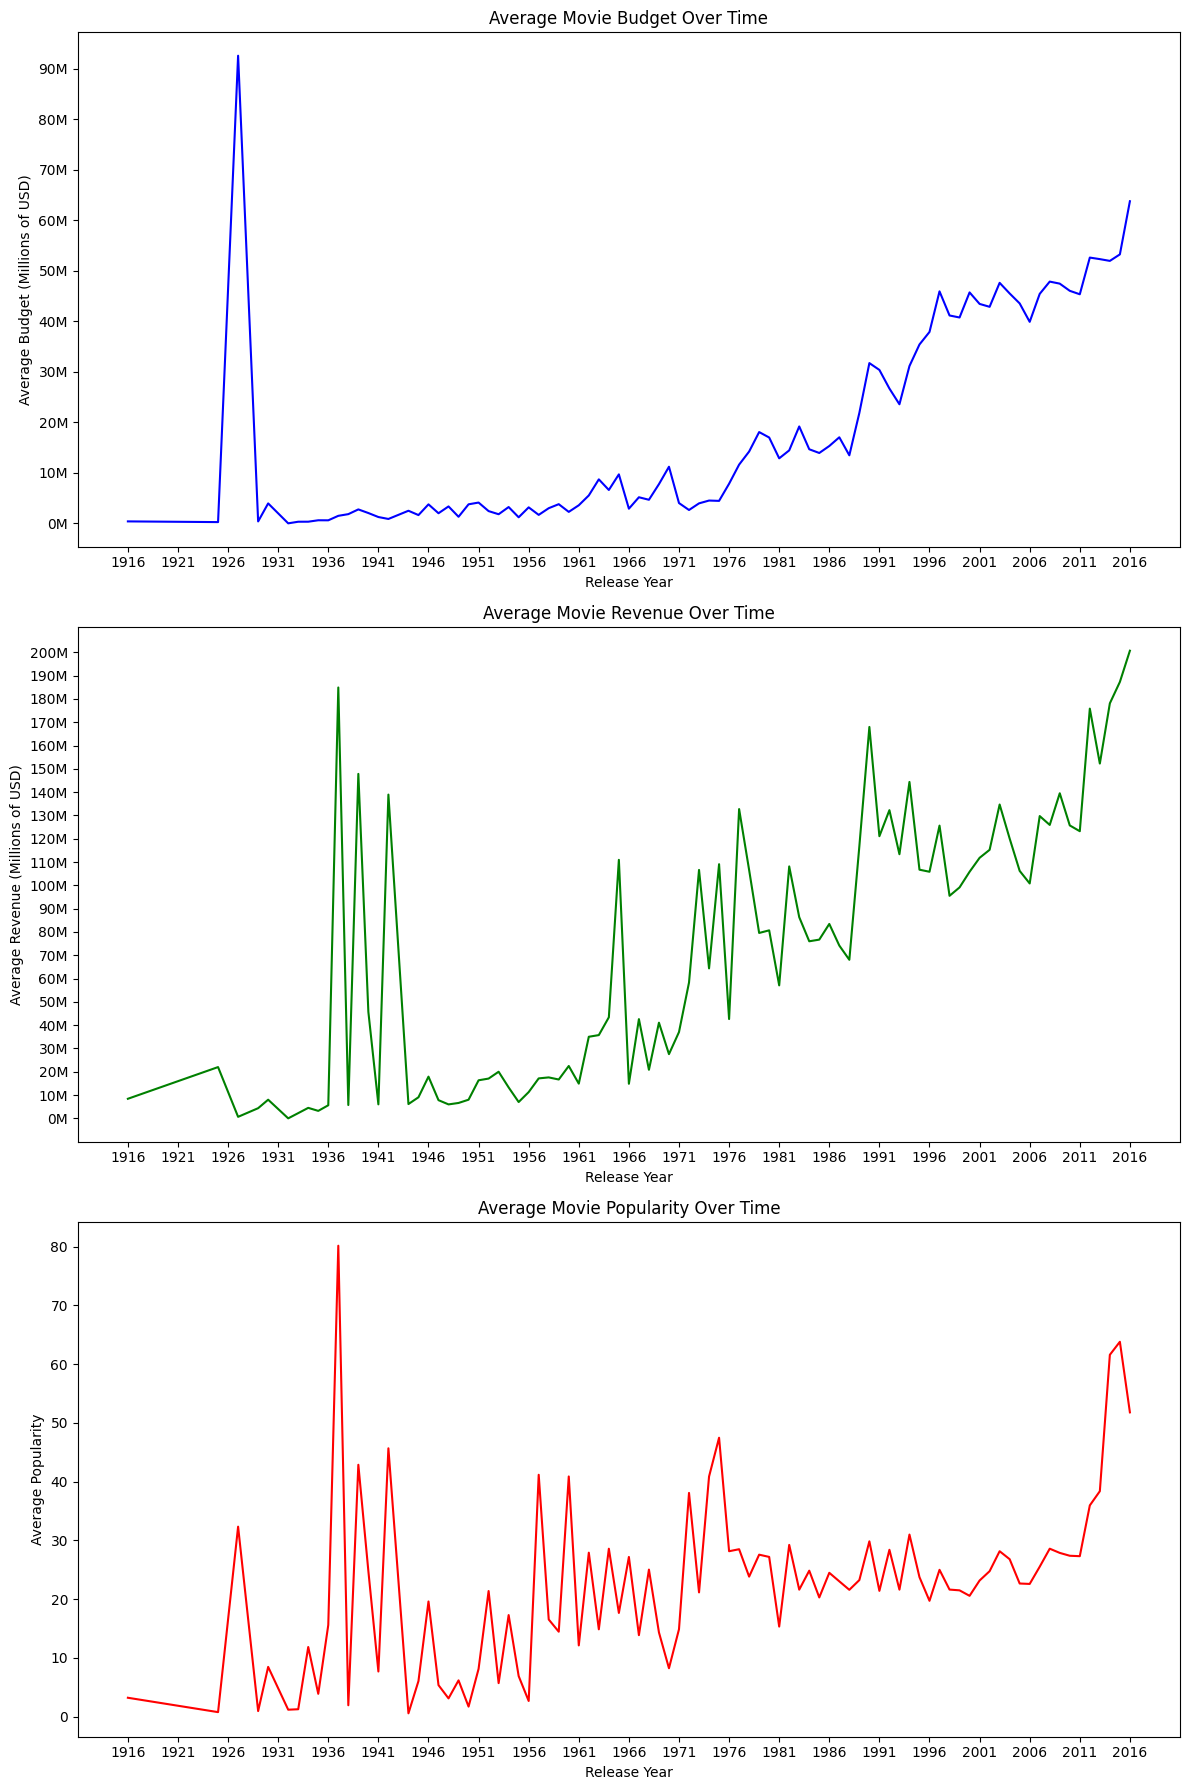

In [ ]:
# Extract release year from release_date
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

# Group by release year and calculate mean values
yearly_data = movies.groupby('release_year').mean().reset_index()

# Plot the trends in movie budgets, revenues, and popularity over time
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

sns.lineplot(data=yearly_data, x='release_year', y='budget', ax=ax[0], color='blue')
ax[0].set_title('Average Movie Budget Over Time')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Average Budget (Millions of USD)')
ax[0].set_xticks(np.arange(yearly_data['release_year'].min(), yearly_data['release_year'].max() + 1, 5))
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x / 1_000_000:.0f}M'))
ax[0].set_yticks(np.arange(0, yearly_data['budget'].max() + 1, 10_000_000))

sns.lineplot(data=yearly_data, x='release_year', y='revenue', ax=ax[1], color='green')
ax[1].set_title('Average Movie Revenue Over Time')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Average Revenue (Millions of USD)')
ax[1].set_xticks(np.arange(yearly_data['release_year'].min(), yearly_data['release_year'].max() + 1, 5))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x / 1_000_000:.0f}M'))
ax[1].set_yticks(np.arange(0, yearly_data['revenue'].max() + 1, 10_000_000))

sns.lineplot(data=yearly_data, x='release_year', y='popularity', ax=ax[2], color='red')
ax[2].set_title('Average Movie Popularity Over Time')
ax[2].set_xlabel('Release Year')
ax[2].set_ylabel('Average Popularity')
ax[2].set_xticks(np.arange(yearly_data['release_year'].min(), yearly_data['release_year'].max() + 1, 5))
ax[2].set_yticks(np.arange(0, yearly_data['popularity'].max() + 1, 10))

plt.tight_layout()
plt.show()

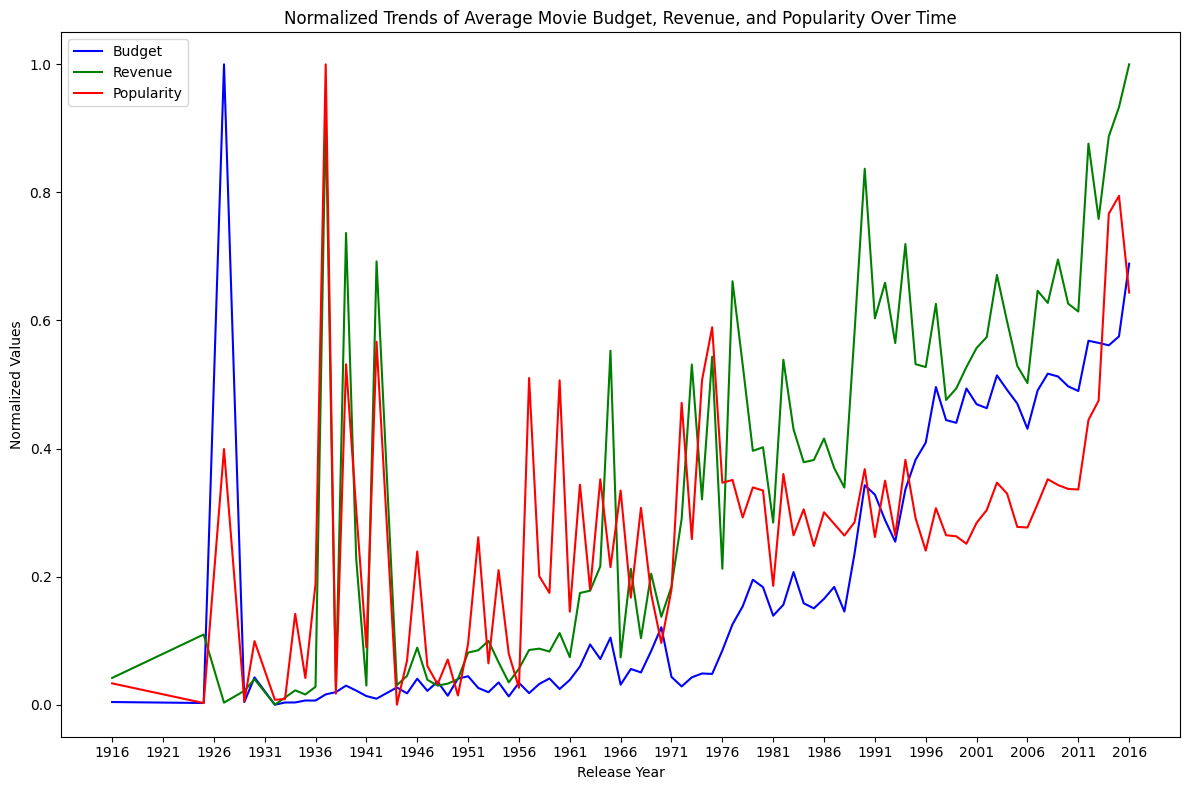

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_yearly_data = scaler.fit_transform(yearly_data[['budget', 'revenue', 'popularity']])
normalized_yearly_data = pd.DataFrame(normalized_yearly_data, columns=['budget', 'revenue', 'popularity'])
normalized_yearly_data['release_year'] = yearly_data['release_year']

# Plot the trends in movie budgets, revenues, and popularity over time
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=normalized_yearly_data, x='release_year', y='budget', ax=ax, label='Budget', color='blue')
sns.lineplot(data=normalized_yearly_data, x='release_year', y='revenue', ax=ax, label='Revenue', color='green')
sns.lineplot(data=normalized_yearly_data, x='release_year', y='popularity', ax=ax, label='Popularity', color='red')

ax.set_title('Normalized Trends of Average Movie Budget, Revenue, and Popularity Over Time')
ax.set_xlabel('Release Year')
ax.set_ylabel('Normalized Values')
ax.set_xticks(np.arange(yearly_data['release_year'].min(), yearly_data['release_year'].max() + 1, 5))

plt.legend()
plt.tight_layout()
plt.show()

#### How has the number of movies released each year changed over time?

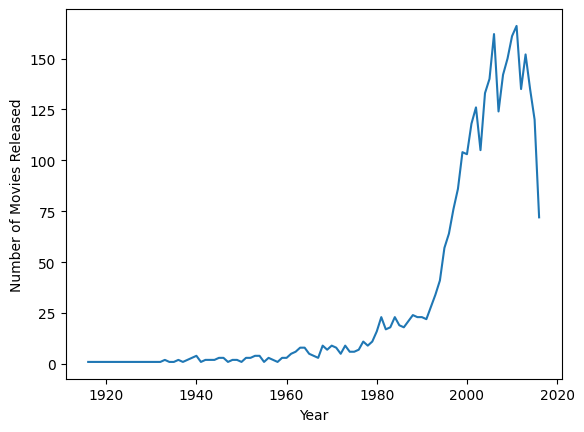

In [ ]:
# Extract the release year from the release date column
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

# Count the number of movies released in each year
year_counts = movies['release_year'].value_counts().sort_index()

# Plot the number of movies released each year
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()

#### What are the trends in movie runtime over time? Are movies getting longer or shorter? How does runtime affect revenue, popularity, and ratings?

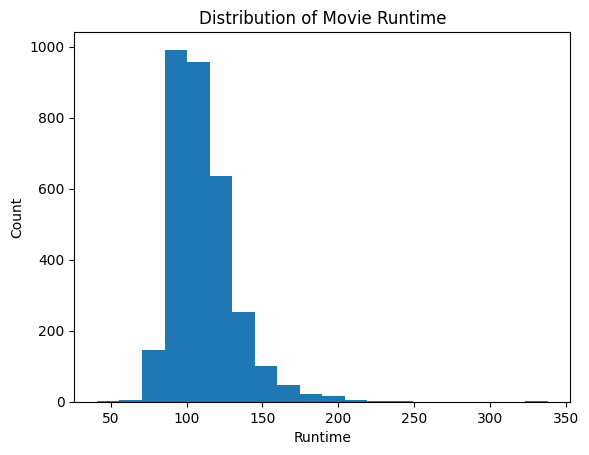

In [ ]:
# distribution of movie runtime
plt.hist(movies['runtime'], bins=20)
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.title('Distribution of Movie Runtime')
plt.show()